# Exercise 6: Analysis of real data  (score 30 points)

With our codes functioning and having been tested properly on a
simpler function we are now ready to look at real data. We will
essentially repeat in this exercise what was done in exercises 1-5. However, we
need first to download the data and prepare properly the inputs to our
codes.  We are going to download digital terrain data from the website
<https://earthexplorer.usgs.gov/>,

Or, if you prefer, we have placed selected datafiles at <https://github.com/CompPhysics/MachineLearning/tree/master/doc/Projects/2021/Project1/DataFiles>

In order to obtain data for a specific region, you need to register as
a user (free) at this website and then decide upon which area you want
to fetch the digital terrain data from.  In order to be able to read
the data properly, you need to specify that the format should be **SRTM
Arc-Second Global** and download the data as a **GeoTIF** file.  The
files are then stored in *tif* format which can be imported into a
Python program using

In [1]:
import numpy as np
from imageio import imread
from sklearn.model_selection import train_test_split
from IPython.display import display
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
import pandas as pd
from numpy.random import normal, uniform
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler


def create_X(x, y, n ):
    L = ['1']
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n+1)*(n+2)/2) # Number of elements in beta
    X = np.ones((N,l))

    for i in range(1,n+1):
        q = int((i)*(i+1)/2)
        for k in range(i+1):
            X[:,q+k] = (x**(i-k))*(y**k)
            if (i == 0 and k == 0) :
                L.append('1')
            elif(i-k == 0):
                L.append('Y^' + str(k))
            elif (k == 0):
                L.append('X^' + str(i-k))
            elif (i==2 and k == 1):
                L.append('XY')
            elif(i-k == 1):
                L.append('X'+'Y^' + str(k))
            elif (k == 1):
                L.append('X^' + str(i-k)+'Y')
            else :
                L.append('X^' + str(i-k)+'Y^'+ str(k))
    return X, L

def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

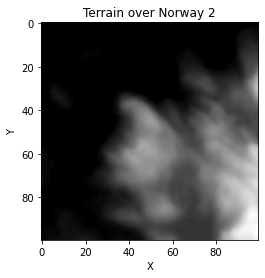

In [2]:
#Set up the DATA

terrain = imread('SRTM_data_Norway_2.tif')

N = 100
terrain = terrain[:N,:N]

# Creates mesh of image pixels
x = np.linspace(0,1, np.shape(terrain)[0])
y = np.linspace(0,1, np.shape(terrain)[1])
x_mesh, y_mesh = np.meshgrid(x,y)

z = terrain


# Show the terrain
plt.figure()
plt.title('Terrain over Norway 2')
plt.imshow(terrain, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

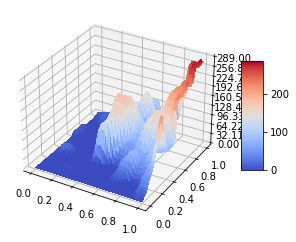

In [3]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot the surface
surf = ax.plot_surface(x_mesh, y_mesh, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

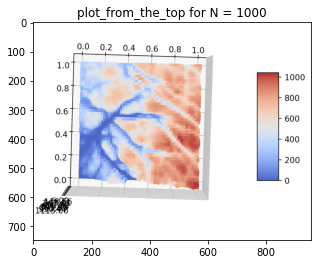

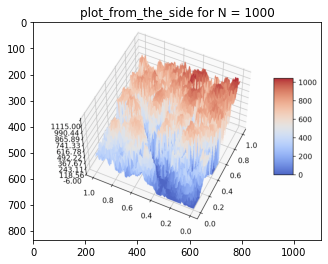

In [4]:
plot1 = imread('plot_from_the_top.png')
plt.figure()
plt.title('plot_from_the_top for N = 1000')
plt.imshow(plot1)
plot2= imread('plot_from_the_side.png')
plt.figure()
plt.title('plot_from_the_side for N = 1000')
plt.imshow(plot2)
plt.show()

Polynomial degree: 1
MSE training :  [1901.55630293]
MSE test :  [1955.0609475]
R2 training :  0.5897943130859584
R2 test :  0.5782945507893866

 

Polynomial degree: 2
MSE training :  [1167.51009964]
MSE test :  [1218.41953159]
R2 training :  0.7481435171463557
R2 test :  0.7371876531260485

 

Polynomial degree: 3
MSE training :  [1018.67433584]
MSE test :  [1041.98915477]
R2 training :  0.7802505216225252
R2 test :  0.7752435773705825

 

Polynomial degree: 4
MSE training :  [767.46724529]
MSE test :  [756.40550802]
R2 training :  0.8344411742881244
R2 test :  0.8368437950987866

 

Polynomial degree: 5
MSE training :  [648.24027707]
MSE test :  [626.93310635]
R2 training :  0.8601609388418898
R2 test :  0.8647709128580336

 

Polynomial degree: 6
MSE training :  [534.22758283]
MSE test :  [523.39836336]
R2 training :  0.8847558748358613
R2 test :  0.8871032935219384

 

Polynomial degree: 7
MSE training :  [432.13785427]
MSE test :  [434.75347667]
R2 training :  0.9067787763736443


<ipython-input-7-dd3b05ddd288>:79: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


Polynomial degree: 20
MSE training :  [80.1882827]
MSE test :  [84.77885656]
R2 training :  0.9827017009502893
R2 test :  0.9817132525542922

 

Polynomial degree: 21
MSE training :  [92.28554138]
MSE test :  [103.54762951]
R2 training :  0.9800920678307803
R2 test :  0.9776648397209118

 

Polynomial degree: 22
MSE training :  [94.03890642]
MSE test :  [101.89795683]
R2 training :  0.979713830116781
R2 test :  0.97802067310863

 

Polynomial degree: 23
MSE training :  [110.45458285]
MSE test :  [121.78559542]
R2 training :  0.9761726234650293
R2 test :  0.9737309216427044

 

Polynomial degree: 24
MSE training :  [118.42037937]
MSE test :  [133.94921318]
R2 training :  0.9744542336237413
R2 test :  0.9711072367394167

 

Polynomial degree: 25
MSE training :  [136.00406596]
MSE test :  [145.91702114]
R2 training :  0.9706610626180916
R2 test :  0.9685257878905639

 

---------------------------- beta coefficient for each polynomial degree ----------------------------


,1,X^1,Y^1,X^2,XY,Y^2,X^3,X^2Y,XY^2,Y^3,...,X^9Y^16,X^8Y^17,X^7Y^18,X^6Y^19,X^5Y^20,X^4Y^21,X^3Y^22,X^2Y^23,XY^24,Y^25
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,56.653945,42.037077,31.007095,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,65.435574,42.225269,30.951616,5.941862,23.074892,-14.762799,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,65.490572,36.119841,48.694916,6.002505,23.042086,-14.913623,6.298745,3.872590,-5.198321,-12.024109,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,94.721374,35.842512,48.834823,-48.129912,22.390871,-42.396175,6.502246,3.825449,-5.286530,-12.146746,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,94.731404,38.180982,87.630518,-48.136569,22.209843,-42.194307,13.005624,-34.434043,-15.025088,-44.965474,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,114.616402,37.668407,88.252481,-129.840208,25.065661,-71.479217,13.820581,-34.850113,-14.671201,-45.670256,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,114.471051,18.769192,121.944257,-129.627757,24.532819,-70.161789,70.054280,-123.954600,-16.790311,-92.830962,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,128.317259,18.649248,122.349800,-222.196355,12.179721,-110.430682,69.613088,-125.654275,-15.679474,-93.088387,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,128.099659,-29.509152,152.842528,-220.631503,10.506727,-108.584173,237.747818,-231.264320,15.514586,-173.891916,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


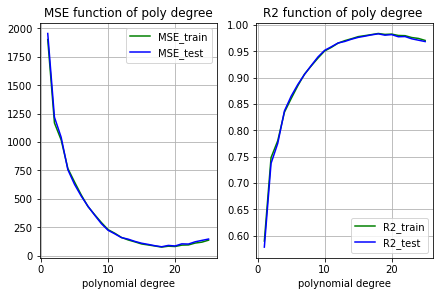

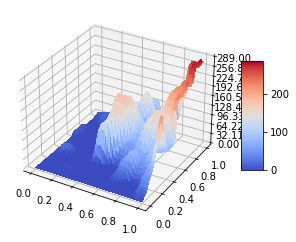

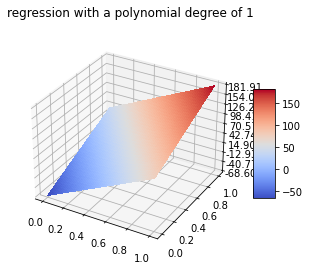

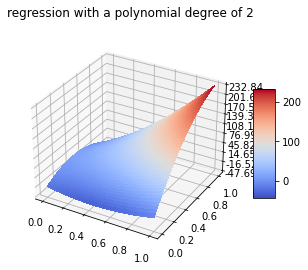

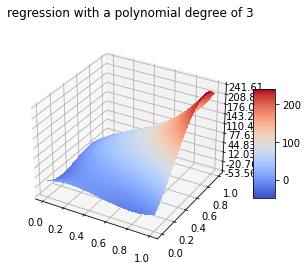

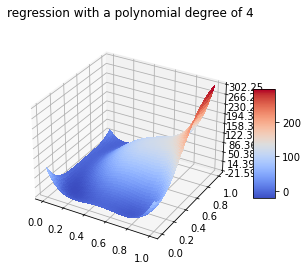

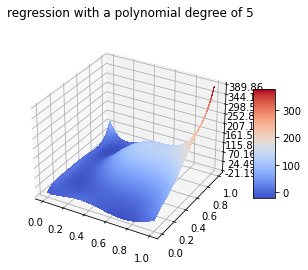

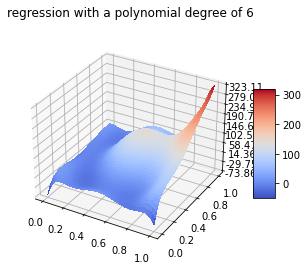

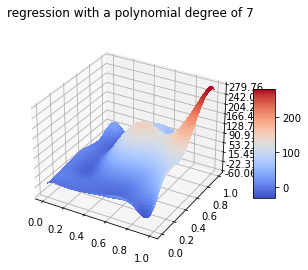

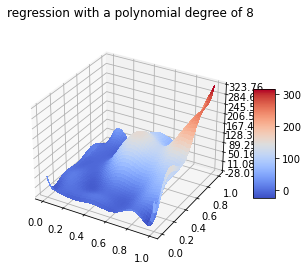

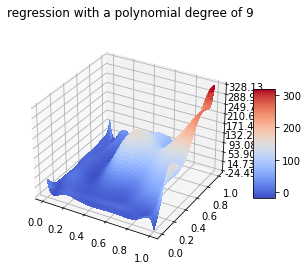

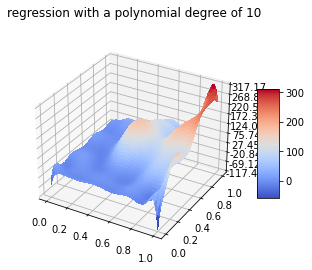

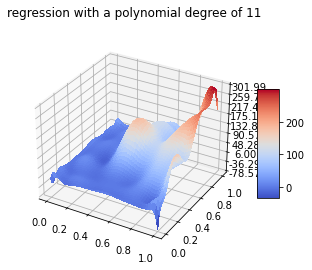

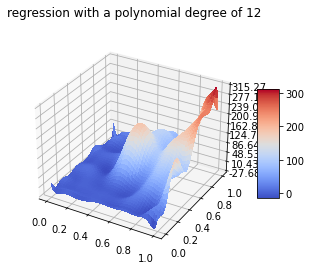

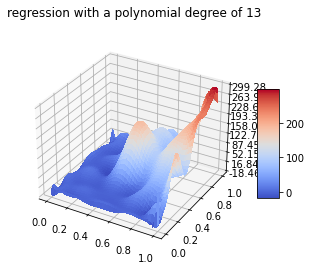

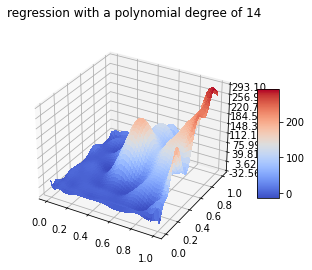

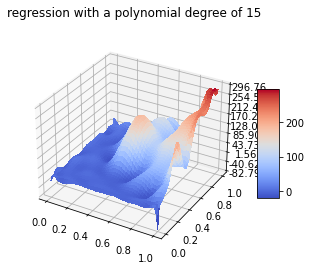

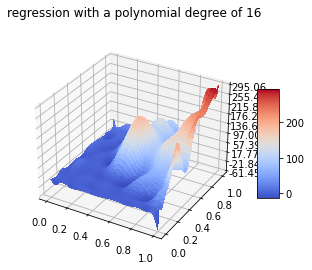

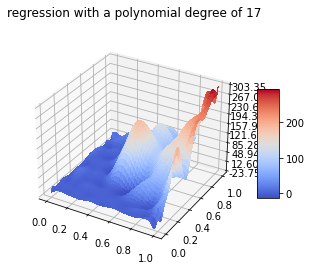

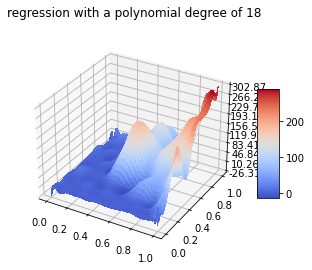

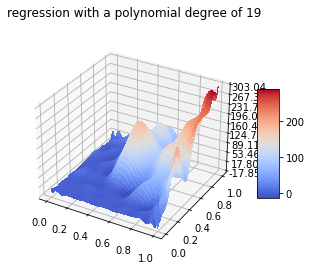

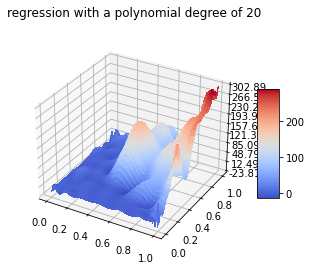

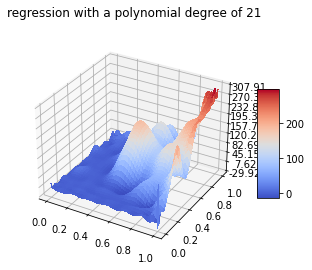

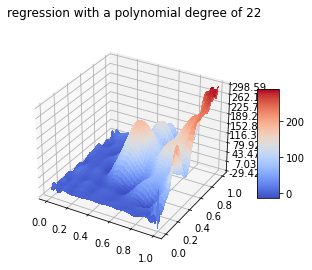

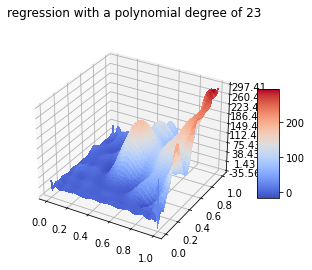

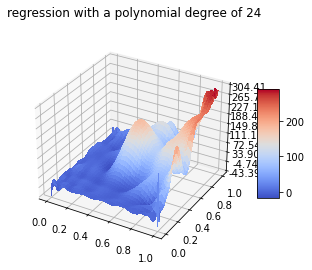

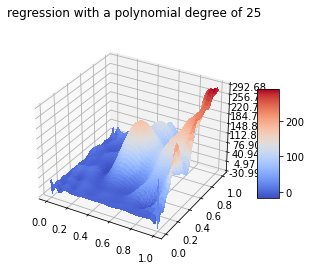

In [7]:
################ OLS regression ##############


################# Parameters #################

DegreeMax = 25
N = 100 #number of data


##############################################


terrain = imread('SRTM_data_Norway_2.tif')
terrain = terrain[:N,:N]

# Creates mesh of image pixels
x = np.linspace(0,1, np.shape(terrain)[0])
y = np.linspace(0,1, np.shape(terrain)[1])
x_mesh, y_mesh = np.meshgrid(x,y)

z = terrain

x_y = np.empty((len(x)*len(x), 2))
x_y[:, 0] = x_mesh.ravel()
x_y[:, 1] = y_mesh.ravel()

scaler = StandardScaler()
scaler.fit(x_y)
x_y = scaler.transform(x_y)

x_y_train, x_y_test, z_train, z_test = train_test_split(x_y, z.ravel(), test_size=0.2)

Liste_degree = range(1, DegreeMax +1)
MSE_train = []
MSE_test = []
R2_train = []
R2_test = []


coeff = int((DegreeMax+1)*(DegreeMax+2)/2)
BETA = np.zeros((DegreeMax+1, coeff))

fig, axs = plt.subplots(1, 2, constrained_layout=True)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x_mesh, y_mesh, z, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.5, aspect=5)

for poly in Liste_degree:

    X_train, coeff = create_X(x_y_train[:, 0], x_y_train[:, 1], poly )
    X_test, coeff = create_X(x_y_test[:, 0], x_y_test[:, 1], poly )
    X , coeff = create_X(x_y[:, 0], x_y[:, 1], poly)
    beta = np.linalg.pinv(X_train.T.dot(X_train)).dot(X_train.T).dot(z_train)

    ztildeOLS = X_train @ beta
    ztestOLS = X_test @ beta
    zplot = X @ beta
    zplot = zplot.reshape(len(x), len(x))

    for j in range(len(beta)):
        BETA[poly][j] = beta[j]

    MSE_train.append(np.mean((z_train - ztildeOLS)**2, keepdims=True ))
    MSE_test.append(np.mean((z_test - ztestOLS)**2, keepdims=True ))
    R2_train.append(R2(z_train, ztildeOLS))
    R2_test.append(R2(z_test, ztestOLS))

    degree = poly
    print("Polynomial degree:", degree)
    print("MSE training : ", MSE_train[degree - 1])
    print("MSE test : ", MSE_test[degree - 1])
    print("R2 training : ", R2_train[degree - 1])
    print("R2 test : ", R2_test[degree - 1])
    print("\n \n")

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(x_mesh, y_mesh, zplot, cmap=cm.coolwarm,linewidth=0, antialiased=False)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    fig.suptitle("regression with a polynomial degree of " + str(degree))
    fig.colorbar(surf, shrink=0.5, aspect=5)


axs[0].plot(Liste_degree, MSE_train, 'green', label='MSE_train')
axs[0].plot(Liste_degree, MSE_test, 'blue', label='MSE_test')
axs[0].set_title("MSE function of poly degree")
axs[0].set_xlabel("polynomial degree")
axs[0].legend()
axs[0].grid()

axs[1].plot(Liste_degree, R2_train, 'green', label="R2_train")
axs[1].plot(Liste_degree, R2_test, 'blue', label="R2_test")
axs[1].set_title("R2 function of poly degree ")
axs[1].set_xlabel("polynomial degree")
axs[1].legend()
axs[1].grid()

print("---------------------------- beta coefficient for each polynomial degree ----------------------------")
DesignMatrix = pd.DataFrame(BETA)
DesignMatrix.columns = coeff
display(DesignMatrix)

plt.show()

Polynomial degree: 1
Error: 1872.7398801149684
Bias^2: 1871.9966724585365
Var: 0.7432076564317879
1872.7398801149684 >= 1871.9966724585365 + 0.7432076564317879 = 1872.7398801149684



Polynomial degree: 2
Error: 1166.0438944755115
Bias^2: 1165.1307959120031
Var: 0.9130985635083512
1166.0438944755115 >= 1165.1307959120031 + 0.9130985635083512 = 1166.0438944755115



Polynomial degree: 3
Error: 1028.6605148319793
Bias^2: 1027.422184670867
Var: 1.238330161112379
1028.6605148319793 >= 1027.422184670867 + 1.238330161112379 = 1028.6605148319793



Polynomial degree: 4
Error: 770.8199087076357
Bias^2: 769.5027377206247
Var: 1.3171709870108603
770.8199087076357 >= 769.5027377206247 + 1.3171709870108603 = 770.8199087076356



Polynomial degree: 5
Error: 657.7060110661337
Bias^2: 655.8086506368383
Var: 1.8973604292953803
657.7060110661337 >= 655.8086506368383 + 1.8973604292953803 = 657.7060110661337



Polynomial degree: 6
Error: 531.463724127721
Bias^2: 529.4963651773696
Var: 1.9673589503511255

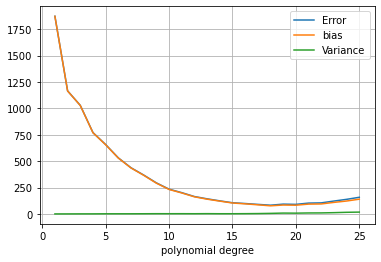

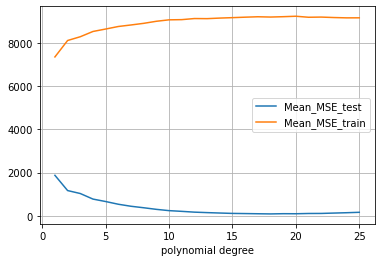

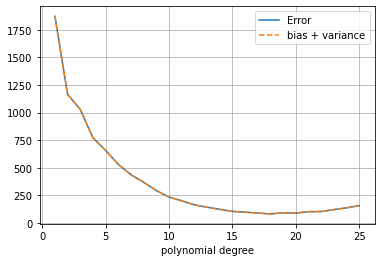

In [16]:
################ OLS regression Bootstrap ##############

################# Parameters #################

N = 100 #number of data
n_bootstraps = 90 #number of boostraps
polynomial = 25 #polynomial degree

#############################################

terrain = imread('SRTM_data_Norway_2.tif')
terrain = terrain[:N,:N]

# Creates mesh of image pixels
x = np.linspace(0,1, np.shape(terrain)[0])
y = np.linspace(0,1, np.shape(terrain)[1])
x_mesh, y_mesh = np.meshgrid(x,y)

z = terrain


x_y = np.empty((len(x)*len(x), 2))
x_y[:, 0] = x_mesh.ravel()
x_y[:, 1] = y_mesh.ravel()

scaler = StandardScaler()
scaler.fit(x_y)
x_y = scaler.transform(x_y)

x_y_train, x_y_test, z_train, z_test = train_test_split(x_y, z.ravel(), test_size=0.2)


error = np.zeros(polynomial)
bias = np.zeros(polynomial)
variance = np.zeros(polynomial)
MSE = np.zeros(polynomial)


list_degree = range(1, polynomial+1)

train_error = np.zeros(polynomial)

for degree in list_degree:

    pred_test = np.empty((z_test.shape[0], n_bootstraps))
    pred_train = np.empty((z_train.shape[0], n_bootstraps))

    for i in range(n_bootstraps):

        x_y_, z_ = resample(x_y_train, z_train)
        X_train, coeff = create_X(x_y_[:, 0], x_y_[:, 1], degree)
        X_test, coeff = create_X(x_y_test[:, 0], x_y_test[:, 1], degree)
        beta = np.linalg.pinv(X_train.T.dot(X_train)).dot(X_train.T).dot(z_)
        pred_test[:, i] = X_test @ beta
        pred_train[:, i] = X_train @ beta

    indice = degree-1
    error[indice] = np.mean( np.mean((z_test.reshape(z_test.shape[0], 1) - pred_test)**2, axis=1, keepdims=True) )
    bias[indice] = np.mean((z_test.reshape(z_test.shape[0], 1) - np.mean(pred_test, axis=1, keepdims=True)) ** 2)
    variance[indice] = np.mean(np.var(pred_test, axis=1, keepdims=True))
    MSE[indice] = np.mean( np.mean((z_train.reshape(z_train.shape[0], 1) - pred_train)**2, axis=1, keepdims=True) )

    print('Polynomial degree:', degree)
    print('Error:', error[indice])
    print('Bias^2:', bias[indice])
    print('Var:', variance[indice])
    print('{} >= {} + {} = {}'.format(error[indice], bias[indice], variance[indice], bias[indice]+variance[indice]))
    print("\n\n")




plt.figure("Bias-variance trade-off ")
plt.plot(list_degree, error, label='Error')
plt.plot(list_degree, bias, label='bias')
plt.plot(list_degree, variance, label='Variance')
plt.xlabel("polynomial degree")
plt.legend()
plt.grid()

plt.figure("MSE")
plt.plot(list_degree, error, label='Mean_MSE_test')
plt.plot(list_degree, MSE, label='Mean_MSE_train')
plt.xlabel("polynomial degree")
plt.legend()
plt.grid()

plt.figure("Bias + variance")
plt.plot(list_degree, error, label='Error')
plt.xlabel("polynomial degree")
plt.plot(list_degree, bias + variance, '--', label='bias + variance')
plt.legend()
plt.grid()

plt.show()

for kFold = 5
Polynomial degree: 1
Error: 3918.0820428590596
Bias^2: 2587.364535678062
Var: 1330.7175071809977
3918.0820428590596 >= 2587.364535678062 + 1330.7175071809977 = 3918.0820428590596



for kFold = 5
Polynomial degree: 2
Error: 6395.633566017986
Bias^2: 2742.1614309995166
Var: 3653.472135018469
6395.633566017986 >= 2742.1614309995166 + 3653.472135018469 = 6395.633566017986



for kFold = 5
Polynomial degree: 3
Error: 6386.294456445738
Bias^2: 3468.768110206324
Var: 2917.5263462394155
6386.294456445738 >= 3468.768110206324 + 2917.5263462394155 = 6386.294456445739



for kFold = 5
Polynomial degree: 4
Error: 6263.974460869782
Bias^2: 2445.0512599169565
Var: 3818.9232009528255
6263.974460869782 >= 2445.0512599169565 + 3818.9232009528255 = 6263.974460869782



for kFold = 5
Polynomial degree: 5
Error: 8267.165571348161
Bias^2: 2663.078785437108
Var: 5604.086785911051
8267.165571348161 >= 2663.078785437108 + 5604.086785911051 = 8267.16557134816



for kFold = 5
Polynomial degree: 

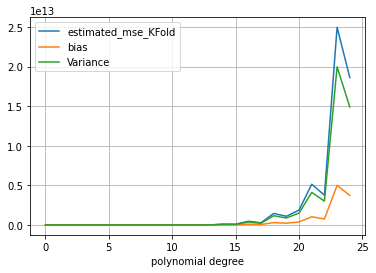

In [25]:
################ OLS regression Cross-Validation ##############

################# Parameters #################

N = 100  #number of data
polynomial = 25 #polynomial degree
k = 5 #number of splits

#############################################

terrain = imread('SRTM_data_Norway_2.tif')
terrain = terrain[:N,:N]

# Creates mesh of image pixels
x = np.linspace(0,1, np.shape(terrain)[0])
y = np.linspace(0,1, np.shape(terrain)[1])
x_mesh, y_mesh = np.meshgrid(x,y)

z = terrain

z = z.ravel()

x_y = np.empty((len(x)*len(x), 2))
x_y[:, 0] = x_mesh.ravel()
x_y[:, 1] = y_mesh.ravel()


scaler = StandardScaler()
scaler.fit(x_y)
x_y = scaler.transform(x_y)

estimated_mse_KFold = np.zeros(polynomial)
bias = np.zeros(polynomial)
variance = np.zeros(polynomial)
MSE = np.zeros(polynomial)


polydegree = np.zeros(polynomial)
train_error = np.zeros(polynomial)



kfold = KFold(n_splits=k)
scores_KFold = np.zeros((polynomial, k))

for degree in range(polynomial):

    z_pred = np.empty((int(z.shape[0]/k), k))
    i = 0

    for train_index, test_index in kfold.split(x_y):
        x_train, x_test = x_y[train_index], x_y[test_index]
        z_train, z_test = z[train_index], z[test_index]
        X_train, coeff = create_X(x_train[:, 0], x_train[:, 1], degree + 1)
        X_test, coeff = create_X(x_test[:, 0], x_test[:, 1], degree + 1)
        beta = np.linalg.pinv(X_train.T.dot(X_train)).dot(X_train.T).dot(z_train)
        z_pred[:, i] = X_test @ beta
        i += 1


    polydegree[degree] = degree
    estimated_mse_KFold[degree] = np.mean(np.mean((z_test.reshape(z_test.shape[0], 1) - z_pred)**2, axis=1, keepdims=True))
    bias[degree] = np.mean((z_test.reshape(z_test.shape[0], 1) - np.mean(z_pred, axis=1, keepdims=True)) ** 2)
    variance[degree] = np.mean(np.var(z_pred, axis=1, keepdims=True))

    print('for kFold =', k)
    print('Polynomial degree:', degree + 1)
    print('Error:', estimated_mse_KFold[degree])
    print('Bias^2:', bias[degree])
    print('Var:', variance[degree])
    print('{} >= {} + {} = {}'.format(estimated_mse_KFold[degree], bias[degree], variance[degree], bias[degree] + variance[degree]))
    print("\n\n")


plt.figure("Cross-Validation for kfold = " + str(k))
plt.plot(polydegree, estimated_mse_KFold, label='estimated_mse_KFold')
plt.plot(polydegree, bias, label='bias')
plt.plot(polydegree, variance, label='Variance')
plt.xlabel("polynomial degree")
plt.legend()
plt.grid()


plt.show()

Polynomial degree: 18
Log10(Lambda): 0.0
---------Bootstrap---------
Error: 169.04783459630843
Bias^2: 164.13903069394897
Var: 4.908803902359505
169.04783459630843 >= 164.13903069394897 + 4.908803902359505 = 169.04783459630846
---------Cross Validation---------
Error_sklearn: 2203987.7338635335



Polynomial degree: 18
Log10(Lambda): 0.2631578947368421
---------Bootstrap---------
Error: 188.6319989071153
Bias^2: 182.76770021568396
Var: 5.864298691431321
188.6319989071153 >= 182.76770021568396 + 5.864298691431321 = 188.63199890711527
---------Cross Validation---------
Error_sklearn: 1825462.4918841675



Polynomial degree: 18
Log10(Lambda): 0.5263157894736842
---------Bootstrap---------
Error: 219.84553221546778
Bias^2: 209.01936198104275
Var: 10.826170234425028
219.84553221546778 >= 209.01936198104275 + 10.826170234425028 = 219.84553221546778
---------Cross Validation---------
Error_sklearn: 1379260.226900633



Polynomial degree: 18
Log10(Lambda): 0.7894736842105263
---------Bootstrap

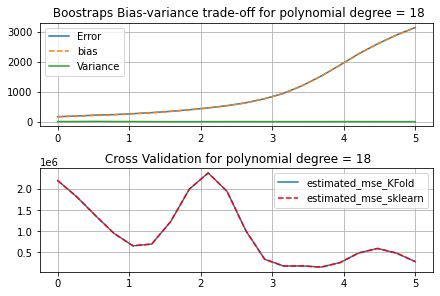

In [12]:
############### Ridge regression Boostsrap and Cross-Validation ###############

################# Parameters #################

N = 100  #number of data
list_degree = [18]
k = 10 #number of splits
n_bootstraps = 20
nlambdas = 20
lambdas = np.logspace(0, 5, nlambdas)

#############################################

terrain = imread('SRTM_data_Norway_2.tif')
terrain = terrain[:N,:N]

# Creates mesh of image pixels
x = np.linspace(0,1, np.shape(terrain)[0])
y = np.linspace(0,1, np.shape(terrain)[1])
x_mesh, y_mesh = np.meshgrid(x,y)

z = terrain

z = z.ravel()

x_y = np.empty((len(x)*len(x), 2))
x_y[:, 0] = x_mesh.ravel()
x_y[:, 1] = y_mesh.ravel()

scaler = StandardScaler()
scaler.fit(x_y)
x_y = scaler.transform(x_y)

x_y_train, x_y_test, z_train, z_test = train_test_split(x_y, z.ravel(), test_size=0.2)


kfold = KFold(n_splits=k)

min_error = []
min_lambdas = []

for degree in list_degree:

    scores_KFold = np.zeros((nlambdas, k))
    estimated_mse_sklearn = np.zeros(nlambdas)


    error = np.zeros(lambdas.shape[0])
    bias = np.zeros(lambdas.shape[0])
    variance = np.zeros(lambdas.shape[0])


    j = 0
    
    
    poly = PolynomialFeatures(degree=degree)
    
    
    for l in lambdas:

        ridge = Ridge(alpha=l, fit_intercept=False)
        pred_test = np.empty((z_test.shape[0], n_bootstraps))
        pred_train = np.empty((z_train.shape[0], n_bootstraps))

        
        
        for i in range(n_bootstraps):
            x_y_, z_ = resample(x_y_train, z_train)
            X_train, coeff = create_X(x_y_[:, 0], x_y_[:, 1], degree)
            X_test, coeff = create_X(x_y_test[:, 0], x_y_test[:, 1], degree)
            RidgeBeta = np.linalg.pinv(X_train.T.dot(X_train) + l * np.eye(X_train.T.dot(X_train).shape[0])).dot(X_train.T).dot(z_)
            pred_test[:, i] = X_test @ RidgeBeta
            pred_train[:, i] = X_train @ RidgeBeta


        z_pred_kfold  = np.empty((int(z.shape[0] / k), k))
        h = 0

     
        
        for train_index, test_index in kfold.split(x_y):
            x_train_kfold, x_test_kfold  = x_y[train_index], x_y[test_index]
            z_train_kfold, z_test_kfold = z[train_index], z[test_index]

            X_train = poly.fit_transform(x_train_kfold)
            ridge.fit(X_train, z_train_kfold)
            Xtest = poly.fit_transform(x_test_kfold)
            zpred = ridge.predict(Xtest)
            scores_KFold[j, h] = np.sum((zpred - z_test_kfold) ** 2) / np.size(zpred)
            z_pred_kfold[:, h] = zpred
            h += 1

        
        
        
        X = poly.fit_transform(x_y)
        estimated_mse_folds = cross_val_score(ridge, X, z, scoring='neg_mean_squared_error',cv=kfold)
        estimated_mse_sklearn[j] = np.mean(-estimated_mse_folds)


        error[j] = np.mean(np.mean((z_test.reshape(z_test.shape[0], 1) - pred_test) ** 2, axis=1, keepdims=True))
        bias[j] = np.mean((z_test.reshape(z_test.shape[0], 1) - np.mean(pred_test, axis=1, keepdims=True)) ** 2)
        variance[j] = np.mean(np.var(pred_test, axis=1, keepdims=True))


        print('Polynomial degree:', degree)
        print('Log10(Lambda):',np.log10(l) )
        print("---------Bootstrap---------")
        print('Error:', error[j])
        print('Bias^2:', bias[j])
        print('Var:', variance[j])
        print('{} >= {} + {} = {}'.format(error[j], bias[j], variance[j], bias[j] + variance[j]))
        print("---------Cross Validation---------")
        print('Error_sklearn:', estimated_mse_sklearn[j])
        print("\n\n")

        j +=1

   

    estimated_mse_KFold = np.mean(scores_KFold, axis=1)
    
    min_error.append(min(estimated_mse_KFold))
    min_lambdas.append(lambdas[np.where(estimated_mse_KFold == np.min(estimated_mse_KFold))])
    
    
    fig, axs = plt.subplots(2, 1, constrained_layout=True)
    axs[0].plot(np.log10(lambdas), error, label='Error')
    axs[0].plot(np.log10(lambdas), bias, '--', label='bias')
    axs[0].plot(np.log10(lambdas), variance, label='Variance')
    axs[0].set_title(" Boostraps Bias-variance trade-off for polynomial degree = " + str(degree))
    axs[0].legend()
    axs[0].grid()

    axs[1].plot(np.log10(lambdas), estimated_mse_KFold, label='estimated_mse_KFold')
    axs[1].plot(np.log10(lambdas), estimated_mse_sklearn,'r--',  label='estimated_mse_sklearn')
    axs[1].set_title(" Cross Validation for polynomial degree = " + str(degree))
    axs[1].legend()
    axs[1].grid()

plt.show()

/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3212376.078600695, tolerance: 6247.483
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3211631.103239607, tolerance: 6272.1727
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3255036.790664249, tolerance: 6280.4575
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_c

Polynomial degree: 18
Log10(Lambda): -3.0
---------Bootstrap---------
Error: 822.2758010956438
Bias^2: 820.9046674930944
Var: 1.3711336025493985
822.2758010956438 >= 820.9046674930944 + 1.3711336025493985 = 822.2758010956438
---------Cross Validation---------
Error_sklearn: 1999.965394064835





/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3146156.9448804418, tolerance: 6305.7169
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3113453.1526607447, tolerance: 6162.1798
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3178568.9085235307, tolerance: 6202.9974
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_mode

Polynomial degree: 18
Log10(Lambda): -2.919191919191919
---------Bootstrap---------
Error: 821.4470878519576
Bias^2: 820.443243034166
Var: 1.003844817791561
821.4470878519576 >= 820.443243034166 + 1.003844817791561 = 821.4470878519576
---------Cross Validation---------
Error_sklearn: 2018.1154614357172





/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3152818.3138423967, tolerance: 6488.5249
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3160246.8114115265, tolerance: 6356.292
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3184194.965056869, tolerance: 6116.12
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_c

Polynomial degree: 18
Log10(Lambda): -2.8383838383838382
---------Bootstrap---------
Error: 822.7032914051852
Bias^2: 821.1485078067647
Var: 1.5547835984204912
822.7032914051852 >= 821.1485078067647 + 1.5547835984204912 = 822.7032914051852
---------Cross Validation---------
Error_sklearn: 2053.5320965982455





/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3165378.62214685, tolerance: 6241.1422
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3088314.013409621, tolerance: 6160.101500000001
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3202911.7009136886, tolerance: 6351.8562
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear

Polynomial degree: 18
Log10(Lambda): -2.757575757575758
---------Bootstrap---------
Error: 821.0778604403226
Bias^2: 819.2698603832487
Var: 1.8080000570739916
821.0778604403226 >= 819.2698603832487 + 1.8080000570739916 = 821.0778604403226
---------Cross Validation---------
Error_sklearn: 2099.438458660009





/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3060579.3835977074, tolerance: 6195.9923
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3121108.3528262074, tolerance: 6422.0160000000005
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3109409.8072563843, tolerance: 6238.9429
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/li

Polynomial degree: 18
Log10(Lambda): -2.676767676767677
---------Bootstrap---------
Error: 820.3456597122051
Bias^2: 818.8781528238048
Var: 1.4675068884002453
820.3456597122051 >= 818.8781528238048 + 1.4675068884002453 = 820.3456597122051
---------Cross Validation---------
Error_sklearn: 2145.4150575929007





/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3165190.62018341, tolerance: 6326.0917
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3122255.8686043643, tolerance: 6306.4397
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3107599.5611975407, tolerance: 6163.106400000001
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linea

Polynomial degree: 18
Log10(Lambda): -2.595959595959596
---------Bootstrap---------
Error: 825.9656835575548
Bias^2: 824.6518047120244
Var: 1.3138788455304276
825.9656835575548 >= 824.6518047120244 + 1.3138788455304276 = 825.9656835575548
---------Cross Validation---------
Error_sklearn: 2145.9118418804424





/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3118839.9521916583, tolerance: 6377.6269
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3076925.234136121, tolerance: 6334.5715
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3166102.01832995, tolerance: 6356.9179
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_

Polynomial degree: 18
Log10(Lambda): -2.515151515151515
---------Bootstrap---------
Error: 820.6222059956386
Bias^2: 819.3273775158992
Var: 1.294828479739244
820.6222059956386 >= 819.3273775158992 + 1.294828479739244 = 820.6222059956385
---------Cross Validation---------
Error_sklearn: 2070.6936606793474





/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3117582.222542717, tolerance: 6082.3604000000005
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3029352.675325578, tolerance: 6183.4692000000005
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3084331.7677518814, tolerance: 6328.122200000001
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-pack

Polynomial degree: 18
Log10(Lambda): -2.4343434343434343
---------Bootstrap---------
Error: 824.125053455092
Bias^2: 822.2477514080208
Var: 1.8773020470712019
824.125053455092 >= 822.2477514080208 + 1.8773020470712019 = 824.125053455092
---------Cross Validation---------
Error_sklearn: 1971.7844370249982





/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3045704.478199364, tolerance: 6228.1993
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3086314.2780038463, tolerance: 6373.9933
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3088333.9209089796, tolerance: 6330.195500000001
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/line

Polynomial degree: 18
Log10(Lambda): -2.3535353535353534
---------Bootstrap---------
Error: 826.5112772110347
Bias^2: 825.2716568714045
Var: 1.2396203396301222
826.5112772110347 >= 825.2716568714045 + 1.2396203396301222 = 826.5112772110347
---------Cross Validation---------
Error_sklearn: 1863.0325034913433





/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3043574.4061408397, tolerance: 6526.809200000001
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2981761.576329975, tolerance: 6372.4939
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3062869.787585974, tolerance: 6246.3247
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linea

Polynomial degree: 18
Log10(Lambda): -2.2727272727272725
---------Bootstrap---------
Error: 829.1959181198064
Bias^2: 827.8384860556121
Var: 1.357432064194292
829.1959181198064 >= 827.8384860556121 + 1.357432064194292 = 829.1959181198064
---------Cross Validation---------
Error_sklearn: 1752.2902442764328





/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2954729.108846562, tolerance: 6200.9615
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3003590.637614034, tolerance: 6307.551
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3037817.2234338154, tolerance: 6331.2866
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_

Polynomial degree: 18
Log10(Lambda): -2.191919191919192
---------Bootstrap---------
Error: 832.2832854698976
Bias^2: 830.9783606310904
Var: 1.3049248388071544
832.2832854698976 >= 830.9783606310904 + 1.3049248388071544 = 832.2832854698976
---------Cross Validation---------
Error_sklearn: 1615.0330343937537





/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2990690.2159500094, tolerance: 6346.3194
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2988863.2913204357, tolerance: 6383.4654
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3069982.1482247277, tolerance: 6410.2357
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_mode

Polynomial degree: 18
Log10(Lambda): -2.111111111111111
---------Bootstrap---------
Error: 836.9828365735228
Bias^2: 835.6378073155078
Var: 1.3450292580150847
836.9828365735228 >= 835.6378073155078 + 1.3450292580150847 = 836.9828365735228
---------Cross Validation---------
Error_sklearn: 1467.21744775





/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2945478.818532324, tolerance: 6467.1684000000005
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2959055.268914898, tolerance: 6218.7835000000005
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2789859.4296982237, tolerance: 6134.0022
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/skl

Polynomial degree: 18
Log10(Lambda): -2.0303030303030303
---------Bootstrap---------
Error: 840.2894359528168
Bias^2: 838.8006608426408
Var: 1.4887751101761257
840.2894359528168 >= 838.8006608426408 + 1.4887751101761257 = 840.2894359528169
---------Cross Validation---------
Error_sklearn: 1313.161177237032





/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2706520.9917552653, tolerance: 6335.670700000001
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2840932.9812322007, tolerance: 6224.623100000001
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2902677.7362178527, tolerance: 6352.936500000001
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-pack

Polynomial degree: 18
Log10(Lambda): -1.9494949494949494
---------Bootstrap---------
Error: 843.431325574009
Bias^2: 842.2724688125091
Var: 1.1588567614999126
843.431325574009 >= 842.2724688125091 + 1.1588567614999126 = 843.4313255740091
---------Cross Validation---------
Error_sklearn: 1165.7514274433502





/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2714961.2159175267, tolerance: 6721.9310000000005
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2639049.394723508, tolerance: 6414.1124
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2664087.269535279, tolerance: 6480.3899
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/line

Polynomial degree: 18
Log10(Lambda): -1.8686868686868685
---------Bootstrap---------
Error: 847.3238277489459
Bias^2: 845.6324559063337
Var: 1.6913718426122635
847.3238277489459 >= 845.6324559063337 + 1.6913718426122635 = 847.323827748946
---------Cross Validation---------
Error_sklearn: 1077.6271701211585





/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2531176.5263444977, tolerance: 6007.5488000000005
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2559399.8798677474, tolerance: 6538.918000000001
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2664231.009384727, tolerance: 6336.8919000000005
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-pac

Polynomial degree: 18
Log10(Lambda): -1.7878787878787878
---------Bootstrap---------
Error: 848.3734585402927
Bias^2: 847.1233835394388
Var: 1.2500750008537933
848.3734585402927 >= 847.1233835394388 + 1.2500750008537933 = 848.3734585402926
---------Cross Validation---------
Error_sklearn: 1031.0602922617331





/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2479591.6609485876, tolerance: 6093.6198
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2426970.6850929074, tolerance: 6275.4264
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2512726.1370462654, tolerance: 6328.6512
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_mode

Polynomial degree: 18
Log10(Lambda): -1.707070707070707
---------Bootstrap---------
Error: 854.1920403584979
Bias^2: 852.8378901509042
Var: 1.3541502075936414
854.1920403584979 >= 852.8378901509042 + 1.3541502075936414 = 854.1920403584978
---------Cross Validation---------
Error_sklearn: 1033.5881575922413





/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1737139.614347998, tolerance: 6293.4456
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2168044.6062820116, tolerance: 6395.5821000000005
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2154637.6844263673, tolerance: 6197.2703
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/lin

Polynomial degree: 18
Log10(Lambda): -1.626262626262626
---------Bootstrap---------
Error: 856.8325563943987
Bias^2: 855.8858078155968
Var: 0.9467485788018097
856.8325563943987 >= 855.8858078155968 + 0.9467485788018097 = 856.8325563943986
---------Cross Validation---------
Error_sklearn: 1109.275440126948





/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1808908.3793422715, tolerance: 6296.1273
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1532707.5821844288, tolerance: 6348.7613
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1789805.5099251377, tolerance: 6332.2466
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_mode

Polynomial degree: 18
Log10(Lambda): -1.5454545454545454
---------Bootstrap---------
Error: 863.5453556446976
Bias^2: 862.4554422823666
Var: 1.0899133623310509
863.5453556446976 >= 862.4554422823666 + 1.0899133623310509 = 863.5453556446976
---------Cross Validation---------
Error_sklearn: 1147.002411371491





/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1393989.2192400112, tolerance: 6027.6414
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1547600.132777722, tolerance: 6313.244000000001
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1403770.4639251004, tolerance: 6299.947300000001
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/skle

Polynomial degree: 18
Log10(Lambda): -1.4646464646464645
---------Bootstrap---------
Error: 869.5903475637307
Bias^2: 868.6343338375823
Var: 0.956013726148535
869.5903475637307 >= 868.6343338375823 + 0.956013726148535 = 869.5903475637308
---------Cross Validation---------
Error_sklearn: 1147.6849165058325





/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1090690.7780718883, tolerance: 6039.2695
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1210948.6227785912, tolerance: 6424.4834
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1123431.3489305084, tolerance: 6446.6935
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_mode

Polynomial degree: 18
Log10(Lambda): -1.3838383838383836
---------Bootstrap---------
Error: 877.5657536924067
Bias^2: 876.2982515552611
Var: 1.2675021371454995
877.5657536924067 >= 876.2982515552611 + 1.2675021371454995 = 877.5657536924066
---------Cross Validation---------
Error_sklearn: 1162.3353876989515





/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 769505.7965107039, tolerance: 6384.003500000001
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 781995.9976142868, tolerance: 6651.9565
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 645398.4161917279, tolerance: 6045.1807
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear

Polynomial degree: 18
Log10(Lambda): -1.303030303030303
---------Bootstrap---------
Error: 888.1172545852112
Bias^2: 887.188593081141
Var: 0.9286615040701971
888.1172545852112 >= 887.188593081141 + 0.9286615040701971 = 888.1172545852112
---------Cross Validation---------
Error_sklearn: 1168.1996440817718





/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 498802.6311971275, tolerance: 6168.3775000000005
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 620136.5281190155, tolerance: 6242.857300000001
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 591548.7268997682, tolerance: 6249.5758000000005
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packa

Polynomial degree: 18
Log10(Lambda): -1.222222222222222
---------Bootstrap---------
Error: 905.9448561242216
Bias^2: 904.5535109314096
Var: 1.3913451928119231
905.9448561242216 >= 904.5535109314096 + 1.3913451928119231 = 905.9448561242216
---------Cross Validation---------
Error_sklearn: 1169.4742219965513





/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 562204.6859961459, tolerance: 6307.7532
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 429029.9008889366, tolerance: 6331.0177
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 494925.2584179742, tolerance: 6362.5913
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_

Polynomial degree: 18
Log10(Lambda): -1.1414141414141412
---------Bootstrap---------
Error: 916.8949005296923
Bias^2: 915.8446945730141
Var: 1.0502059566780817
916.8949005296923 >= 915.8446945730141 + 1.0502059566780817 = 916.8949005296921
---------Cross Validation---------
Error_sklearn: 1180.4472476702697





/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 582716.5310544698, tolerance: 6296.6152
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 499862.6762807034, tolerance: 6507.4130000000005
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 548551.5956642162, tolerance: 6250.7307
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linea

Polynomial degree: 18
Log10(Lambda): -1.0606060606060606
---------Bootstrap---------
Error: 928.9889534974994
Bias^2: 927.9703179041138
Var: 1.0186355933857723
928.9889534974994 >= 927.9703179041138 + 1.0186355933857723 = 928.9889534974996
---------Cross Validation---------
Error_sklearn: 1185.946413653086





/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 782423.6352892844, tolerance: 6214.0423
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 726946.9440319957, tolerance: 6318.189600000001
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 740290.1081919465, tolerance: 6145.502100000001
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklear

Polynomial degree: 18
Log10(Lambda): -0.9797979797979797
---------Bootstrap---------
Error: 944.4366892057823
Bias^2: 943.4434294955689
Var: 0.9932597102133489
944.4366892057823 >= 943.4434294955689 + 0.9932597102133489 = 944.4366892057823
---------Cross Validation---------
Error_sklearn: 1197.6399981043292





/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 692382.5700506251, tolerance: 6363.4172
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 561443.0055133905, tolerance: 5884.1549
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 634211.4901939128, tolerance: 6115.3234
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_

Polynomial degree: 18
Log10(Lambda): -0.8989898989898988
---------Bootstrap---------
Error: 959.8928786339076
Bias^2: 958.5286671083493
Var: 1.3642115255583958
959.8928786339076 >= 958.5286671083493 + 1.3642115255583958 = 959.8928786339077
---------Cross Validation---------
Error_sklearn: 1197.449797668483





/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 376609.1776818754, tolerance: 6436.591200000001
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 427426.991503465, tolerance: 6432.5749000000005
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 405981.75067715906, tolerance: 6332.053400000001
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packag

Polynomial degree: 18
Log10(Lambda): -0.8181818181818179
---------Bootstrap---------
Error: 981.6901287566842
Bias^2: 980.7009318769217
Var: 0.9891968797625491
981.6901287566842 >= 980.7009318769217 + 0.9891968797625491 = 981.6901287566842
---------Cross Validation---------
Error_sklearn: 1204.518099035667





/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 350340.8359636711, tolerance: 6301.7055
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 337031.6029021032, tolerance: 6507.472500000001
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 319324.80894805957, tolerance: 6318.6059000000005
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/skle

Polynomial degree: 18
Log10(Lambda): -0.737373737373737
---------Bootstrap---------
Error: 998.6587557553039
Bias^2: 997.7861509991135
Var: 0.8726047561903988
998.6587557553039 >= 997.7861509991135 + 0.8726047561903988 = 998.6587557553039
---------Cross Validation---------
Error_sklearn: 1217.1826838653587





/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 156920.8314246377, tolerance: 6018.072700000001
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 163599.25914303586, tolerance: 6303.9517000000005
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 177292.62459374312, tolerance: 6218.029100000001
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-pack

Polynomial degree: 18
Log10(Lambda): -0.6565656565656566
---------Bootstrap---------
Error: 1022.1374225581205
Bias^2: 1021.2241736443243
Var: 0.9132489137961337
1022.1374225581205 >= 1021.2241736443243 + 0.9132489137961337 = 1022.1374225581204
---------Cross Validation---------
Error_sklearn: 1220.8551740651897





/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 169741.59699308965, tolerance: 6193.0070000000005
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 166142.96632653568, tolerance: 6244.2807
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 161804.32752126735, tolerance: 6140.856000000001
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sk

Polynomial degree: 18
Log10(Lambda): -0.5757575757575757
---------Bootstrap---------
Error: 1040.5758416137446
Bias^2: 1039.6351345085386
Var: 0.9407071052061852
1040.5758416137446 >= 1039.6351345085386 + 0.9407071052061852 = 1040.5758416137448
---------Cross Validation---------
Error_sklearn: 1217.299330592302





/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 117830.59353601746, tolerance: 6328.6772
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106829.228581856, tolerance: 6159.9366
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 122615.87002942711, tolerance: 6340.655400000001
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linea

Polynomial degree: 18
Log10(Lambda): -0.49494949494949475
---------Bootstrap---------
Error: 1059.824900927222
Bias^2: 1059.1757249402474
Var: 0.6491759869745204
1059.824900927222 >= 1059.1757249402474 + 0.6491759869745204 = 1059.824900927222
---------Cross Validation---------
Error_sklearn: 1224.9473308460479





/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48366.82573101297, tolerance: 6192.2685
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75141.44813762978, tolerance: 6420.2853000000005
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46708.58249515202, tolerance: 6280.5308
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linea

Polynomial degree: 18
Log10(Lambda): -0.4141414141414139
---------Bootstrap---------
Error: 1075.9379229535853
Bias^2: 1075.2665224051066
Var: 0.6714005484784862
1075.9379229535853 >= 1075.2665224051066 + 0.6714005484784862 = 1075.937922953585
---------Cross Validation---------
Error_sklearn: 1246.1922283159843





/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48064.74541023001, tolerance: 6345.7595
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31382.86380048096, tolerance: 6113.4379
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36301.90365313925, tolerance: 6296.8265
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_

Polynomial degree: 18
Log10(Lambda): -0.33333333333333304
---------Bootstrap---------
Error: 1094.2985925609676
Bias^2: 1093.404455377218
Var: 0.8941371837496608
1094.2985925609676 >= 1093.404455377218 + 0.8941371837496608 = 1094.2985925609678
---------Cross Validation---------
Error_sklearn: 1285.5847905478017





/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32067.53013365157, tolerance: 6377.6596
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32765.077599914744, tolerance: 6134.7588000000005
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28331.660095883533, tolerance: 6321.8481
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/lin

Polynomial degree: 18
Log10(Lambda): -0.25252525252525215
---------Bootstrap---------
Error: 1117.249875533953
Bias^2: 1116.5488223600448
Var: 0.7010531739079643
1117.249875533953 >= 1116.5488223600448 + 0.7010531739079643 = 1117.2498755339527
---------Cross Validation---------
Error_sklearn: 1337.6299433200195





/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10725.94137073867, tolerance: 6223.8141000000005
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9276.369715768844, tolerance: 6389.6804
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11805.689989687875, tolerance: 6195.184
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linea

Polynomial degree: 18
Log10(Lambda): -0.1717171717171713
---------Bootstrap---------
Error: 1150.6432587345348
Bias^2: 1150.0670222555148
Var: 0.5762364790197361
1150.6432587345348 >= 1150.0670222555148 + 0.5762364790197361 = 1150.6432587345346
---------Cross Validation---------
Error_sklearn: 1400.0536723754672





/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11083.13063967973, tolerance: 6136.2502
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11920.93452767469, tolerance: 6212.5016000000005
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6527.820053970441, tolerance: 6396.7617
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linea

Polynomial degree: 18
Log10(Lambda): -0.0909090909090908
---------Bootstrap---------
Error: 1171.6985008711376
Bias^2: 1170.960830865618
Var: 0.7376700055201382
1171.6985008711376 >= 1170.960830865618 + 0.7376700055201382 = 1171.698500871138
---------Cross Validation---------
Error_sklearn: 1466.5415112939259





/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16296.490746967494, tolerance: 6420.3841
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10849.856413353235, tolerance: 6322.027
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10056.67948873341, tolerance: 7834.1045
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/

Polynomial degree: 18
Log10(Lambda): -0.010101010101009927
---------Bootstrap---------
Error: 1201.5461463504826
Bias^2: 1201.1139763718465
Var: 0.4321699786361229
1201.5461463504826 >= 1201.1139763718465 + 0.4321699786361229 = 1201.5461463504826
---------Cross Validation---------
Error_sklearn: 1490.2742557499246





/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10953.589520441368, tolerance: 6283.590300000001
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9531.856855658814, tolerance: 7834.1045
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28216.27812929824, tolerance: 7805.0839000000005
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/skle

Polynomial degree: 18
Log10(Lambda): 0.07070707070707095
---------Bootstrap---------
Error: 1233.4602087694673
Bias^2: 1232.774854719065
Var: 0.6853540504021722
1233.4602087694673 >= 1232.774854719065 + 0.6853540504021722 = 1233.460208769467
---------Cross Validation---------
Error_sklearn: 1516.3128149756308





/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6646.802593048662, tolerance: 6372.183300000001
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12217.647824849933, tolerance: 6439.746700000001
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7898.831950839609, tolerance: 6466.5429
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklea

Polynomial degree: 18
Log10(Lambda): 0.1515151515151518
---------Bootstrap---------
Error: 1280.6814894470585
Bias^2: 1279.9610358809578
Var: 0.7204535661011783
1280.6814894470585 >= 1279.9610358809578 + 0.7204535661011783 = 1280.681489447059
---------Cross Validation---------
Error_sklearn: 1575.245910787968





/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12506.509890910238, tolerance: 6318.3698
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10870.368530856445, tolerance: 6457.0154
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9228.573110779747, tolerance: 7805.0839000000005
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/lin

Polynomial degree: 18
Log10(Lambda): 0.2323232323232327
---------Bootstrap---------
Error: 1370.541977550341
Bias^2: 1369.74054078894
Var: 0.8014367614008734
1370.541977550341 >= 1369.74054078894 + 0.8014367614008734 = 1370.541977550341
---------Cross Validation---------
Error_sklearn: 1649.7522631957872





/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21689.92731781304, tolerance: 7167.1449
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21689.92731781304, tolerance: 7167.1449
  model = cd_fast.enet_coordinate_descent(


Polynomial degree: 18
Log10(Lambda): 0.31313131313131354
---------Bootstrap---------
Error: 1447.0570731313016
Bias^2: 1446.1724637304433
Var: 0.8846094008582907
1447.0570731313016 >= 1446.1724637304433 + 0.8846094008582907 = 1447.0570731313016
---------Cross Validation---------
Error_sklearn: 1689.4530149662





/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13700.705621032044, tolerance: 7167.1449
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12993.838081430644, tolerance: 6637.107800000001
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12999.788791356608, tolerance: 6265.7015
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/lin

Polynomial degree: 18
Log10(Lambda): 0.39393939393939403
---------Bootstrap---------
Error: 1477.5664785711801
Bias^2: 1476.9883419594937
Var: 0.5781366116866988
1477.5664785711801 >= 1476.9883419594937 + 0.5781366116866988 = 1477.5664785711804
---------Cross Validation---------
Error_sklearn: 1698.8091772979483





/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10763.597961977124, tolerance: 7167.1449
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7860.196184135973, tolerance: 6637.107800000001
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10763.597961977124, tolerance: 7167.1449
  model = cd_fast.enet_coordinate_descent(
/Users/paulgiraud/opt/anaconda3/lib/python3.8/site-packages/sklearn/line

Polynomial degree: 18
Log10(Lambda): 0.4747474747474749
---------Bootstrap---------
Error: 1519.058094538096
Bias^2: 1518.4575857404147
Var: 0.6005087976812804
1519.058094538096 >= 1518.4575857404147 + 0.6005087976812804 = 1519.058094538096
---------Cross Validation---------
Error_sklearn: 1737.478538118455



Polynomial degree: 18
Log10(Lambda): 0.5555555555555558
---------Bootstrap---------
Error: 1569.293459237278
Bias^2: 1568.8050606462575
Var: 0.4883985910205448
1569.293459237278 >= 1568.8050606462575 + 0.4883985910205448 = 1569.293459237278
---------Cross Validation---------
Error_sklearn: 1806.877119362604



Polynomial degree: 18
Log10(Lambda): 0.6363636363636367
---------Bootstrap---------
Error: 1657.6254414126465
Bias^2: 1657.1974113105875
Var: 0.42803010205914926
1657.6254414126465 >= 1657.1974113105875 + 0.42803010205914926 = 1657.6254414126468
---------Cross Validation---------
Error_sklearn: 1894.0113427401466



Polynomial degree: 18
Log10(Lambda): 0.7171717171717176
--

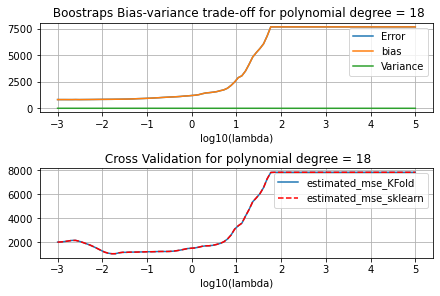

In [19]:
############### Lasso regression Boostsrap and Cross-Validation ###############

################# Parameters #################

N = 100  #number of data
list_degree = [18]
k = 10 #number of splits
n_bootstraps = 10
nlambdas = 100
lambdas = np.logspace(-3, 5, nlambdas)

#############################################

terrain = imread('SRTM_data_Norway_2.tif')
terrain = terrain[:N,:N]

# Creates mesh of image pixels
x = np.linspace(0,1, np.shape(terrain)[0])
y = np.linspace(0,1, np.shape(terrain)[1])
x_mesh, y_mesh = np.meshgrid(x,y)

z = terrain
z = z.ravel()

x_y = np.empty((len(x)*len(x), 2))
x_y[:, 0] = x_mesh.ravel()
x_y[:, 1] = y_mesh.ravel()
x_y_train, x_y_test, z_train, z_test = train_test_split(x_y, z.ravel(), test_size=0.2)


Error = np.empty((len(lambdas), len(list_degree)))

kfold = KFold(n_splits=k)


for degree in list_degree:

    scores_KFold = np.zeros((nlambdas, k))
    estimated_mse_sklearn = np.zeros(nlambdas)


    error = np.zeros(lambdas.shape[0])
    bias = np.zeros(lambdas.shape[0])
    variance = np.zeros(lambdas.shape[0])


    j = 0

    poly = PolynomialFeatures(degree=degree)
    
    for l in lambdas:

        lasso_bootstrap = Lasso(alpha=l, fit_intercept=False, max_iter = 100)
        lasso_cv = Lasso(alpha=l, fit_intercept=False, max_iter = 100)
        pred_test = np.empty((z_test.shape[0], n_bootstraps))
        pred_train = np.empty((z_train.shape[0], n_bootstraps))

        for i in range(n_bootstraps):
            
            x_y_, z_ = resample(x_y_train, z_train)
            X_train = poly.fit_transform(x_y_)
            lasso_bootstrap.fit(X_train, z_)
            Xtest = poly.fit_transform(x_y_test)
            pred_test[:, i] = lasso_bootstrap.predict(Xtest)


        z_pred_kfold  = np.empty((int(z.shape[0] / k), k))
        h = 0

        for train_index, test_index in kfold.split(x_y):
            x_train_kfold, x_test_kfold  = x_y[train_index], x_y[test_index]
            z_train_kfold, z_test_kfold = z[train_index], z[test_index]

            X_train = poly.fit_transform(x_train_kfold)
            lasso_cv.fit(X_train, z_train_kfold)
            Xtest = poly.fit_transform(x_test_kfold)
            zpred = lasso_cv.predict(Xtest)
            scores_KFold[j, h] = np.sum((zpred - z_test_kfold) ** 2) / np.size(zpred)
            z_pred_kfold[:, h] = zpred
            h += 1

        X = poly.fit_transform(x_y)
        
        estimated_mse_folds = cross_val_score(lasso_cv, X, z, scoring='neg_mean_squared_error',cv=kfold)
        estimated_mse_sklearn[j] = np.mean(-estimated_mse_folds)


        error[j] = np.mean(np.mean((z_test.reshape(z_test.shape[0], 1) - pred_test) ** 2, axis=1, keepdims=True))
        bias[j] = np.mean((z_test.reshape(z_test.shape[0], 1) - np.mean(pred_test, axis=1, keepdims=True)) ** 2)
        variance[j] = np.mean(np.var(pred_test, axis=1, keepdims=True))


        print('Polynomial degree:', degree)
        print('Log10(Lambda):',np.log10(l) )
        print("---------Bootstrap---------")
        print('Error:', error[j])
        print('Bias^2:', bias[j])
        print('Var:', variance[j])
        print('{} >= {} + {} = {}'.format(error[j], bias[j], variance[j], bias[j] + variance[j]))
        print("---------Cross Validation---------")
        print('Error_sklearn:', estimated_mse_sklearn[j])
        print("\n\n")

        j +=1

    fig, axs = plt.subplots(2, 1, constrained_layout=True)

    estimated_mse_KFold = np.mean(scores_KFold, axis=1)

    axs[0].plot(np.log10(lambdas), error, label='Error')
    axs[0].plot(np.log10(lambdas), bias, label='bias')
    axs[0].plot(np.log10(lambdas), variance, label='Variance')
    axs[0].set_title(" Boostraps Bias-variance trade-off for polynomial degree = " + str(degree))
    axs[0].set_xlabel("log10(lambda)")
    axs[0].legend()
    axs[0].grid()

    axs[1].plot(np.log10(lambdas), estimated_mse_KFold, label='estimated_mse_KFold')
    axs[1].plot(np.log10(lambdas), estimated_mse_sklearn,'r--',  label='estimated_mse_sklearn')
    axs[1].set_title(" Cross Validation for polynomial degree = " + str(degree))
    axs[1].set_xlabel("log10(lambda)")
    axs[1].legend()
    axs[1].grid()

plt.show()